In [34]:
# Importing all the required libraries. 

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns' , None)

# for feature encoding and feature scaling.  
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder , StandardScaler 

# for train-test splitting. 
from sklearn.model_selection import train_test_split 

# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Metrics Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
x = df.drop('math score' , axis = 1)
y = df['math score']

In [4]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,male,group A,high school,standard,completed,67,63
1,female,group D,some high school,free/reduced,none,59,55
2,male,group E,some college,free/reduced,none,60,50
3,male,group B,high school,standard,none,78,68
4,male,group E,associate's degree,standard,completed,73,68


In [5]:
y[:5]

0    67
1    40
2    59
3    77
4    78
Name: math score, dtype: int64

In [6]:
x.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
reading score                   int64
writing score                   int64
dtype: object

####  Create column transformer with 3 types of transformers. 


In [7]:

num_features = [feature for feature in x.columns if x[feature].dtypes != 'O']
obj_features = [feature for feature in x.columns if x[feature].dtypes == 'O']

print(f"Numerical features: {num_features}")
print(f"categorical features : {obj_features}")

Numerical features: ['reading score', 'writing score']
categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [8]:
numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder" , oh_transformer , obj_features) , 
        ("StandardScaler" , numerical_transformer , num_features)
    ]
)

In [9]:
x = preprocessor.fit_transform(x)


In [10]:
x[:5]

array([[ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        , -0.13591401, -0.30385073],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        , -0.67902695, -0.81689543],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        , -0.61113783, -1.13754838],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.   

In [11]:
# Train-Test Splitting. 

x_train,x_test,y_train,y_test = train_test_split(x , y , random_state = 42 , test_size = 0.2)

print(f"X train shape : {x_train.shape}")
print(f"Y train shape : {y_train.shape}")
print(f"X test shape : {x_test.shape}")
print(f"Y test shape : {y_test.shape}")

X train shape : (800, 19)
Y train shape : (800,)
X test shape : (200, 19)
Y test shape : (200,)


In [14]:
# Create an evaluation function. 

def evaluate_model(true , predicted): 
    mae = mean_absolute_error(true , predicted)
    mse = mean_squared_error(true , predicted)
    rmse = np.sqrt(mean_squared_error(true , predicted))
    r2_square = r2_score(true , predicted)
    return mae,mse,rmse,r2_square
 


In [20]:
models = {
    "Linear Regression" : LinearRegression() , 
    "Lasso" : Lasso(), 
    "Ridge" : Ridge(), 
    "K-Neighbors" : KNeighborsRegressor() , 
    "Decision Tree" : DecisionTreeRegressor() , 
    "Random Forest" : RandomForestRegressor() , 
    "XGBoost reg" : XGBRegressor() , 
    "CatBoost reg" : CatBoostRegressor(),
    "AdaBoost reg" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train , y_train) # Train model. 

    # Make Predictions 

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluation of train and test dataset.
    model_train_mae , model_train_mse,  model_train_rmse , model_train_r2 = evaluate_model(y_train , y_train_pred)
    model_test_mae , model_test_mse , model_test_rmse , model_test_r2 = evaluate_model(y_test , y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for training set")
    print(f"Root Mean Squared Error: {model_train_rmse}")
    print(f"Mean Absolute Error : {model_train_mae}")
    print(f"R2 score : {model_train_r2}")

    print("-"* 32)

    print("Model performance for test set ")
    print(f"Root Mean Squarred Error : {model_test_rmse}")
    print(f"Mean Absolute Error: {model_test_mae}")
    print(f"R2 Score : {model_test_r2}")

    r2_list.append(model_test_r2)
    print("="*35)
    print("\n")

Linear Regression
Model Performance for training set
Root Mean Squared Error: 5.533332169007942
Mean Absolute Error : 4.445
R2 score : 0.8711379963371395
--------------------------------
Model performance for test set 
Root Mean Squarred Error : 5.505832229336239
Mean Absolute Error: 4.5621484375
R2 Score : 0.8704841634182088


Lasso
Model Performance for training set
Root Mean Squared Error: 6.816783393396277
Mean Absolute Error : 5.422786567048213
R2 score : 0.8044263304110502
--------------------------------
Model performance for test set 
Root Mean Squarred Error : 6.8048935229427086
Mean Absolute Error: 5.3351816698165315
R2 Score : 0.8021574978289543


Ridge
Model Performance for training set
Root Mean Squared Error: 5.533100208561524
Mean Absolute Error : 4.443124408229828
R2 score : 0.8711488000483433
--------------------------------
Model performance for test set 
Root Mean Squarred Error : 5.5057755064404965
Mean Absolute Error: 4.565421035104229
R2 Score : 0.8704868320340133

In [22]:
pd.DataFrame(list(zip(model_list , r2_list)) , columns = ['Model Name' , "R2_Score"]).sort_values(by = ['R2_Score'] , ascending = False)

,Model Name,R2_Score
2,Ridge,0.870487
0,Linear Regression,0.870484
7,CatBoost reg,0.855096
5,Random Forest,0.839170
6,XGBoost reg,0.825770
8,AdaBoost reg,0.817926
3,K-Neighbors,0.811823
1,Lasso,0.802157
4,Decision Tree,0.682146


In [31]:
ridge_model = Ridge()
ridge_model = ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.05


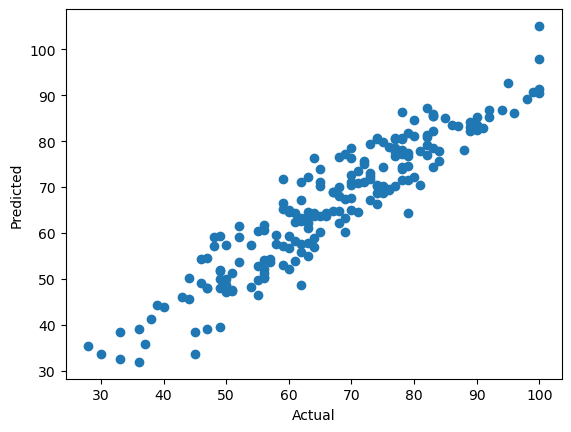

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

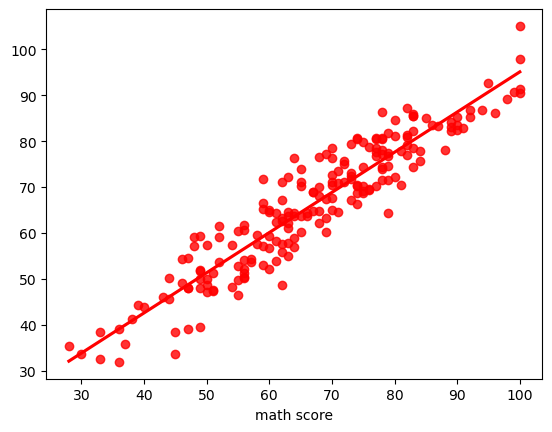

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [37]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df[:5]

,Actual Value,Predicted Value,Difference
521,65,70.312677,-5.312677
737,83,85.875379,-2.875379
740,52,59.218261,-7.218261
660,90,82.411776,7.588224
411,62,62.571449,-0.571449
